## 誤ったモデルの検証方法

In [1]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [9]:
model.fit(X, y)
y_model = model.predict(X)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

## 正しいモデルの検証方法

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.9066666666666666

## 交差検定

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [18]:
from sklearn.model_selection import LeaveOneOut

In [20]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
scores.mean()

0.96

## 検証曲線


$$
    y = ax + b
$$

$$
    y = ax^3 + bx^2 + cx + d
$$

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwarges):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwarges))

In [44]:
import numpy as np

def make_data(N, err=1, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 -1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [45]:
X, y = make_data(40)

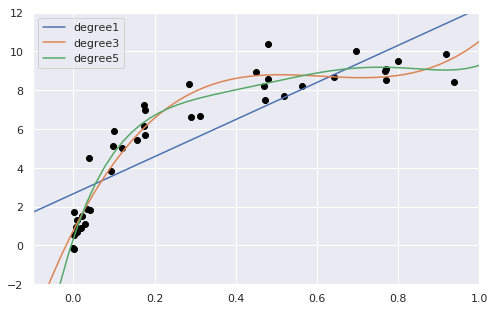

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X_test = np.linspace(-0.1, 11,500)[:, None]

plt.figure(figsize=(8, 5))
plt.scatter(X.ravel(), y, color='black')
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree{}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')